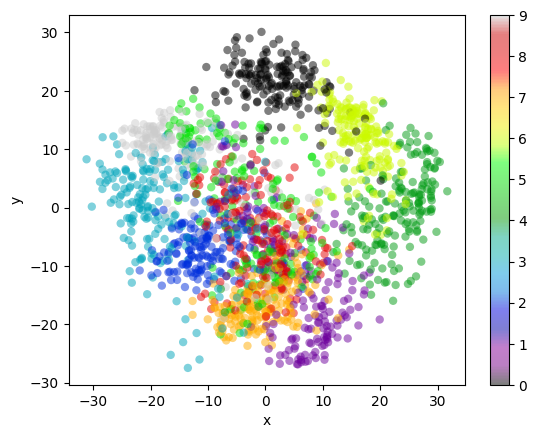

In [211]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()
X, Y = digits.data, digits.target

# PCA function that must be made from zero
pca = PCA(n_components=2)
X = pca.fit_transform(X)

plt.scatter(X[:,0], X[:,1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.colormaps["nipy_spectral"])

plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

In [212]:
# Inizializzazione di K centroidi casuali d'esempio dalla matrice X
def init_rand_centroids(K,X):
    
    m,n = np.shape(X)
    centroids = np.empty((K,n))

    for i in range(K):
        centroids[i] =  X[np.random.choice(range(m))]

    return centroids

In [213]:
# Calcolo della distanza euclidea
def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

In [214]:
# Trova e restituisce l'indice del centroide più vicino di un vettore di X
def closest_centroid(x, centroids, K):
    
    distances = np.empty(K)

    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)

    return np.argmin(distances)

In [215]:
# Restituisce una matrice di indici di cluster per tutti i campioni di dati
def create_clusters(centroids, K, X):
    
    m, _ = np.shape(X)
    cluster_idx = np.empty(m)
    
    for i in range(m):
        cluster_idx[i] = closest_centroid(X[i], centroids, K)
        
    return cluster_idx

In [216]:
# Calcolo della media dei nuovi centroidi dei cluster
def means(cluster_idx, K, X):
    
    cluster_i_points = []

    _, n = np.shape(X)
    centroids = np.empty((K, n))

    for i in range(K):
        points = X[cluster_idx == i] # Raggruppa i punti per il cluster 'i'
        centroids[i] = np.mean(points, axis=0) # Calcolo media dei punti
        cluster_i_points.append(points)

    return centroids, cluster_i_points

In [217]:
# Calcolo del K-means e dei cluster finali
def K_means(K, X, max_iterations = 500):
    
    centroids = init_rand_centroids(K, X)
    # print(f"initial centroids: {centroids}")

    # Loop fino a max_iterations o convergenza
    for _ in range(max_iterations):
        
        clusters = create_clusters(centroids, K, X)
        prev_centroids = centroids                          
        
        centroids, points = means(clusters, K, X)
        
        diff = prev_centroids - centroids

        if not diff.any():
            return centroids, points

    return centroids, points

# "cluster" conserva in un n array l'indice del cluster in cui va il punto
# "centroids" conserva le coordinate dei K centroidi
#  "points" conserva tutte le coordinate di tutti i punti per ciascun cluster

Text(0, 0.5, 'y')

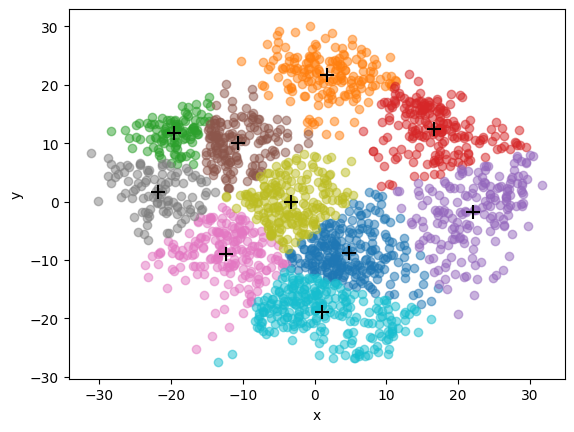

In [218]:
K = 10

centroids, points = K_means(K, X, 500)

for i in range(K):
    plt.scatter(points[i][:,0],points[i][:,1],alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], marker="+", s=100, color="black")

plt.xlabel('x')
plt.ylabel('y')